# Data Analysis

In [134]:
import pandas as pd

summary_data = pd.read_csv('./cse4705_summary_data.csv')

## Average Sale Price By Year

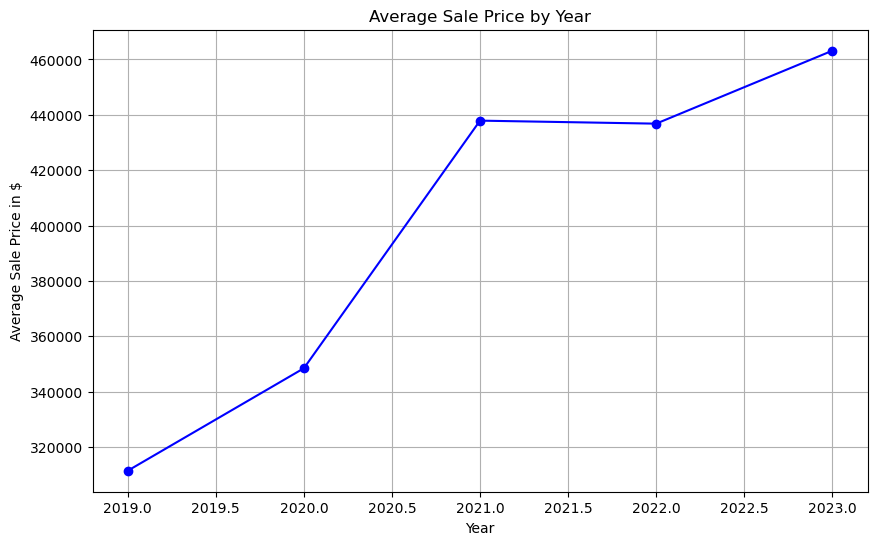

count         5.000000
mean     399565.777577
std       65714.823855
min      311465.567913
25%      348477.432460
50%      436818.056193
75%      437907.517009
max      463160.314312
Name: avg_sale_price, dtype: float64


In [135]:
import matplotlib.pyplot as plt

# group data by year and calculate mean of sale price
avg_sale_price_by_year = summary_data.groupby('year')['avg_sale_price'].mean()

# plot trend of average sale price over time
plt.figure(figsize=(10,6))
plt.plot(avg_sale_price_by_year.index, avg_sale_price_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Sale Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Sale Price in $')
plt.grid(True)
plt.show()

# basic statistics
avg_sale_price_stats = avg_sale_price_by_year.describe()
print(avg_sale_price_stats)

Statistical Summary

Count: 5 years \
Mean: ~ $383,500 \
Standard Deviation: ~ $65,402. This shows some variability in the sale prices \
Min: ~ $296,400 \
25th Percentile (Q1): The 25% of years had average sale prices below $331,466 \
Median (Q2): The median sale price is $421,497 \
75th Percentile (Q3): The 75% of years had average sale prices below $422,722 \
Max: ~ $445,418 \
Range: ~ $149,018

## Missing Value Analysis

In [136]:
# some import already included above
# pandas 

# find missing values
missing_values_count = summary_data.isnull().sum()

missing_values_percentage = (missing_values_count / len(summary_data)) * 100

missing_values_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})
print(missing_values_summary)

                                                   Missing Values Count  \
year                                                                  0   
town                                                                  0   
count                                                                 0   
avg_sale_price                                                        0   
sale_price_q1                                                         0   
median_sale_price                                                     0   
sale_price_q3                                                         0   
avg_sales_ratio                                                       0   
sales_ratio_q1                                                        0   
median_sales_ratio                                                    0   
sales_ratio_q3                                                        0   
avg_assessed_value                                                    0   
assessed_value_q1        

For the columns have ~16.9% of missing values, we can
1. Use mean/median imputation because they are numerical columns 
2. Use more advanced techniques like regression imputation or KNN imputation (using other columns as predictors for missing values)

For the 5 columns that have a very high percentage of missing values (37.6%, 79%, 100%), they will be removed as it could compromise the validity of further analysis

## Univariate Distribution Visualization

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

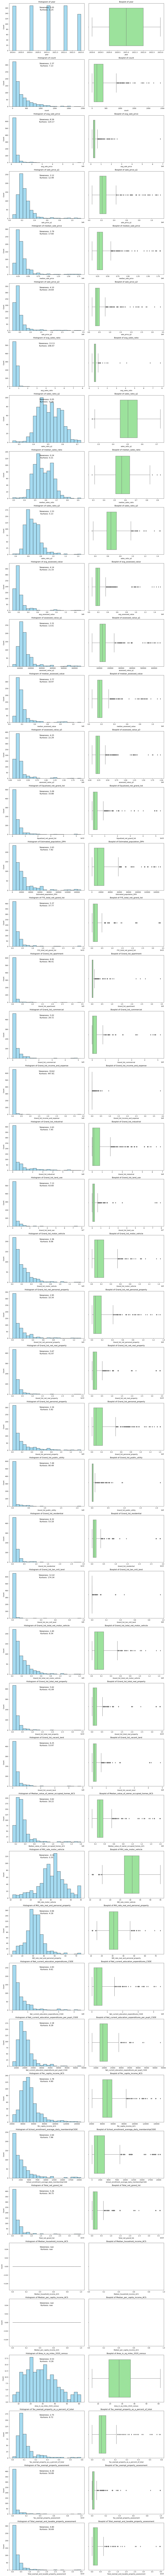

In [137]:
# Some import already included above
# pandas
# matplotlib.pyplot
import seaborn as sns
from scipy.stats import skew, kurtosis

# list of (numerical) columns to visualize
numerical_columns = summary_data.select_dtypes(include=['float64', 'int64']).columns

# create histograms, box plots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, 5 * len(numerical_columns)))

for i, column in enumerate(numerical_columns):
    # histogram
    sns.histplot(summary_data[column], kde=False, ax=axes[i, 0], color='skyblue', bins=20)
    axes[i, 0].set_title(f'Histogram of {column}')
    
    # boxplot
    sns.boxplot(x=summary_data[column], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {column}')
    
    # skewness and kurtosis
    column_skewness = skew(summary_data[column].dropna())
    column_kurtosis = kurtosis(summary_data[column].dropna())
    
    axes[i, 0].text(0.5, 0.9, f'Skewness: {column_skewness:.2f}', transform=axes[i, 0].transAxes, fontsize=12, ha='center')
    axes[i, 0].text(0.5, 0.85, f'Kurtosis: {column_kurtosis:.2f}', transform=axes[i, 0].transAxes, fontsize=12, ha='center')

plt.tight_layout()
plt.show()

Note \
Box plot - values beyond 1.5 * IQR are marked as points outside the whiskers \
Skewness - Positive skew indicates a long right tail, negative skew indicates a long left tail \
Kurtosis - High kurtosis indicates heavy tails (outliers), low kurtosis indicates light tails (less outliers) 

A log transformation or square root transformation can make the distribution more normal if the skewness is significantly different from 0 \
If the kurtosis is high, it suggests the presence of outliers

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

Applied log transformation to count (Skewness: 2.37)
Applied log transformation to avg_sale_price (Skewness: 8.59)
Applied log transformation to sale_price_q1 (Skewness: 3.12)
Applied log transformation to median_sale_price (Skewness: 3.79)
Applied log transformation to sale_price_q3 (Skewness: 4.10)
Applied log transformation to avg_sales_ratio (Skewness: 13.13)
Applied log transformation to sales_ratio_q3 (Skewness: 1.53)
Applied log transformation to avg_assessed_value (Skewness: 4.14)
Applied log transformation to assessed_value_q1 (Skewness: 3.31)
Applied log transformation to median_assessed_value (Skewness: 3.77)
Applied log transformation to assessed_value_q3 (Skewness: 4.25)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

Applied log transformation to Equalized_net_grand_list (Skewness: 5.09)
Applied log transformation to Estimated_population_DPH (Skewness: 2.63)
Applied log transformation to FYE_total_net_grand_list (Skewness: 5.37)
Applied log transformation to Grand_list_apartment (Skewness: 8.81)
Applied log transformation to Grand_list_commercial (Skewness: 5.02)
Applied log transformation to Grand_list_income_and_expense (Skewness: 19.62)
Applied log transformation to Grand_list_industrial (Skewness: 2.63)
Applied log transformation to Grand_list_land_use (Skewness: 7.13)
Applied log transformation to Grand_list_motor_vehicle (Skewness: 2.36)
Applied log transformation to Grand_list_net_personal_property (Skewness: 2.95)
Applied log transformation to Grand_list_net_real_property (Skewness: 5.67)
Applied log transformation to Grand_list_personal_property (Skewness: 2.34)
Applied log transformation to Grand_list_public_utility (Skewness: 7.49)
Applied log transformation to Grand_list_residential (Sk

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

Applied log transformation to Grand_list_ten_mill_land (Skewness: 12.42)
Applied log transformation to Grand_list_total_net_motor_vehicle (Skewness: 2.40)
Applied log transformation to Grand_list_total_real_property (Skewness: 5.62)
Applied log transformation to Grand_list_vacant_land (Skewness: 6.25)
Applied log transformation to Median_value_of_owner_occupied_homes_ACS (Skewness: 3.62)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

Applied log transformation to Net_current_education_expenditures_CSDE (Skewness: 2.83)
Applied log transformation to Net_current_education_expenditures_per_pupil_CSDE (Skewness: 2.18)
Applied log transformation to Per_capita_income_ACS (Skewness: 1.78)
Applied log transformation to School_enrollment_average_daily_membershipCSDE (Skewness: 2.64)
Applied log transformation to Total_net_grand_list (Skewness: 5.26)
Applied log transformation to Tax_exempt_property_as_a_percent_of_total (Skewness: 2.75)
Applied log transformation to Tax_exempt_property_assessment (Skewness: 6.30)
Applied log transformation to Total_exempt_and_taxable_property_assessment (Skewness: 4.80)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


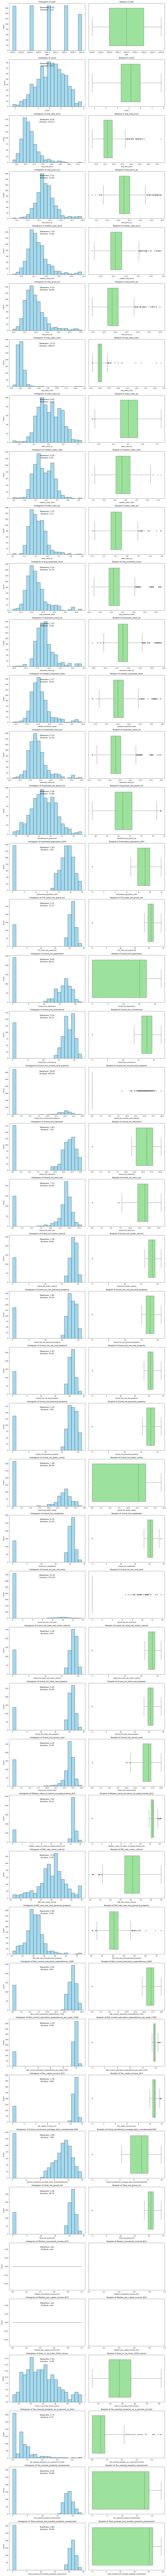

In [138]:
# Some import already included above
# numpy

# list of (numerical) columns to visualize
numerical_columns = summary_data.select_dtypes(include=['float64', 'int64']).columns

# create histograms, box plots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, 5 * len(numerical_columns)))

for i, column in enumerate(numerical_columns):
    column_skewness = skew(summary_data[column].dropna())
    column_kurtosis = kurtosis(summary_data[column].dropna())
    
    # check if transformation is needed
    if abs(column_skewness) > 1:  # apply transformation if skewness is significant
        summary_data[column] = summary_data[column].apply(lambda x: np.log(x + 1) if x > 0 else 0)  # log transformation
        print(f'Applied log transformation to {column} (Skewness: {column_skewness:.2f})')
    elif abs(column_skewness) < -1:  # apply square root transformation for negative skewness
        summary_data[column] = summary_data[column].apply(lambda x: np.sqrt(x) if x >= 0 else 0)  # square root transformation
        print(f'Applied square root transformation to {column} (Skewness: {column_skewness:.2f})')
    
    sns.histplot(summary_data[column], kde=False, ax=axes[i, 0], color='skyblue', bins=20)
    axes[i, 0].set_title(f'Histogram of {column}')
    
    sns.boxplot(x=summary_data[column], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {column}')
    
    axes[i, 0].text(0.5, 0.9, f'Skewness: {column_skewness:.2f}', transform=axes[i, 0].transAxes, fontsize=12, ha='center')
    axes[i, 0].text(0.5, 0.85, f'Kurtosis: {column_kurtosis:.2f}', transform=axes[i, 0].transAxes, fontsize=12, ha='center')

plt.tight_layout()
plt.show()

Note

If the skewness of a column > 1, meaning a positive skew, apply a log transformation: np.log(x + 1) (adding 1 to avoid taking the log of zero)

If the column skewness < -1, meaning a negative skew, apply a square root transformation: np.sqrt(x)

This transformation helps bring values closer to a normal distribution, more symmetric

## Correlation and Relationship Analysis

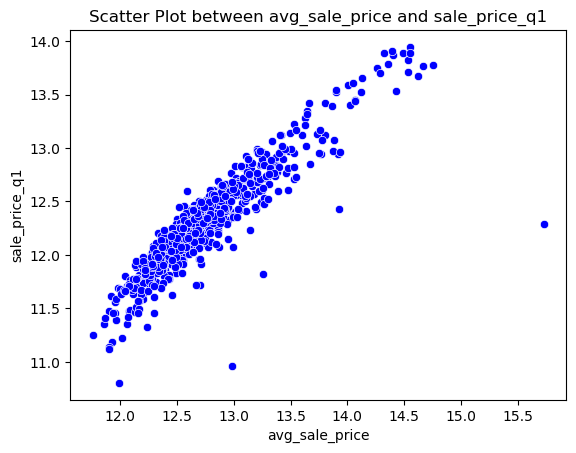

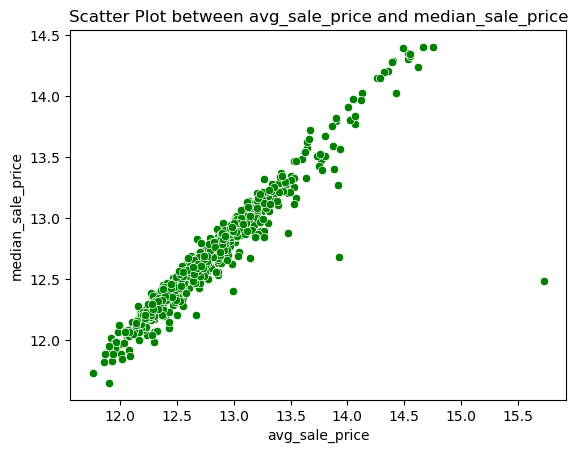

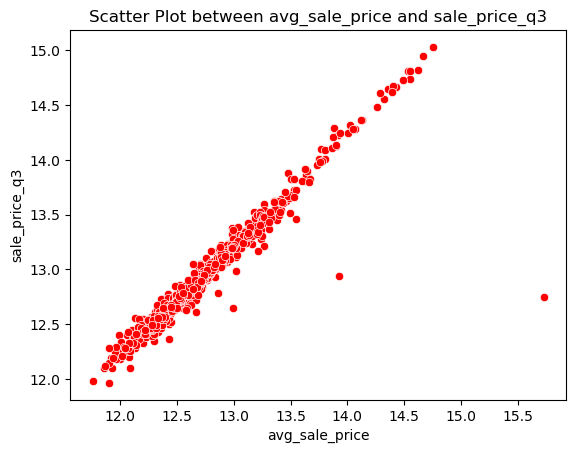

In [139]:
# seaborn, matplotlib.pyplot 

# list of (numerical) columns to analyze
numerical_columns = summary_data.select_dtypes(include=['float64', 'int64']).columns

# scatter plots looking at relationship 
# between the average sale price and sale prices from Q1, Q2, & Q3. 
sns.scatterplot(data=summary_data, x='avg_sale_price', y='sale_price_q1', color='blue')
plt.title('Scatter Plot between avg_sale_price and sale_price_q1')
plt.xlabel('avg_sale_price')
plt.ylabel('sale_price_q1')
plt.show()

sns.scatterplot(data=summary_data, x='avg_sale_price', y='median_sale_price', color='green')
plt.title('Scatter Plot between avg_sale_price and median_sale_price')
plt.xlabel('avg_sale_price')
plt.ylabel('median_sale_price')
plt.show()

sns.scatterplot(data=summary_data, x='avg_sale_price', y='sale_price_q3', color='red')
plt.title('Scatter Plot between avg_sale_price and sale_price_q3')
plt.xlabel('avg_sale_price')
plt.ylabel('sale_price_q3')
plt.show()

Note

Look at the relationship between the average sale price and sale prices from Q1, Q2, & Q3. They have a strong relation

## Outlier Detection and Analysis

In [140]:
from scipy.stats import zscore

# list of (numerical) columns to analyze
numerical_columns = summary_data.select_dtypes(include=['float64', 'int64']).columns

# Z-score for outlier detection
z_scores = summary_data[numerical_columns].apply(zscore)
outliers_z_score = (z_scores.abs() > 3)  # Z-score threshold of 3 for outliers

# rows with outliers based on Z-score
outliers_z_score_df = summary_data[outliers_z_score.any(axis=1)]
print("Outliers detected based on Z-scores:")
print(outliers_z_score_df)

Outliers detected based on Z-scores:
     year        town     count  avg_sale_price  sale_price_q1  \
1    2019     Ansonia  5.509388       12.176404      11.885702   
9    2019   Bethlehem  2.833213       12.679346      12.257839   
14   2019  Bridgeport  7.574045       12.205030      11.631828   
20   2019      Canaan  3.583519       12.234773      11.323833   
28   2019   Colebrook  2.833213       12.495663      11.835016   
..    ...         ...       ...             ...            ...   
725  2023    Hartford  6.329721       12.457277      11.951187   
748  2023  New Canaan  5.493061       14.388329      13.910822   
795  2023   Waterbury  7.021976       12.334120      11.982935   
800  2023      Weston  4.867534       14.050017      13.604791   
801  2023    Westport  5.823046       14.551968      13.892473   

     median_sale_price  sale_price_q3  avg_sales_ratio  sales_ratio_q1  \
1            12.206078      12.437288         0.606014        0.556475   
9            12.834684

Note

The Z-scores is calculated for each numerical feature. Outliers are identified as points with a Z-score greater than 3 or less than -3

## Consistenly very low or very high sales ratio

In [141]:
import pandas as pd

# Grouping the data by 'town' and 'year' to get the average sales ratio across years
town_sales_ratio = summary_data.groupby(['town', 'year'])['avg_sales_ratio'].mean().unstack()

# We define high sales ratio as > 0.85 and low sales ratio as < 0.50
# Let's find towns where the sales ratio is consistently above 0.85 or below 0.50 for at least 5 years

# Find towns with a consistent high sales ratio (>= 0.85 for 5 years)
high_sales_ratio_towns = town_sales_ratio[(town_sales_ratio > 0.85).sum(axis=1) >= 5]

# Find towns with a consistent low sales ratio (<= 0.50 for 5 years)
low_sales_ratio_towns = town_sales_ratio[(town_sales_ratio < 0.50).sum(axis=1) >= 5]

# Combine the results into one DataFrame for easier viewing
consistent_sales_ratio_towns = pd.concat([high_sales_ratio_towns, low_sales_ratio_towns])

# Display the results
print("Towns with Consistent High or Low Sales Ratios:")
print(consistent_sales_ratio_towns)


Towns with Consistent High or Low Sales Ratios:
year          2019     2020    2021      2022      2023
town                                                   
Hartford  0.399809  0.36936  0.3111  0.300693  0.288002


# Graph that shows the sales ratio over 5 years (2019-2024) for all towns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/9d/_d3xgvmd6wlcfjnhml584c_r0000gn/T/ipykernel_19310/1152464986.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # To prevent overlap with the legend


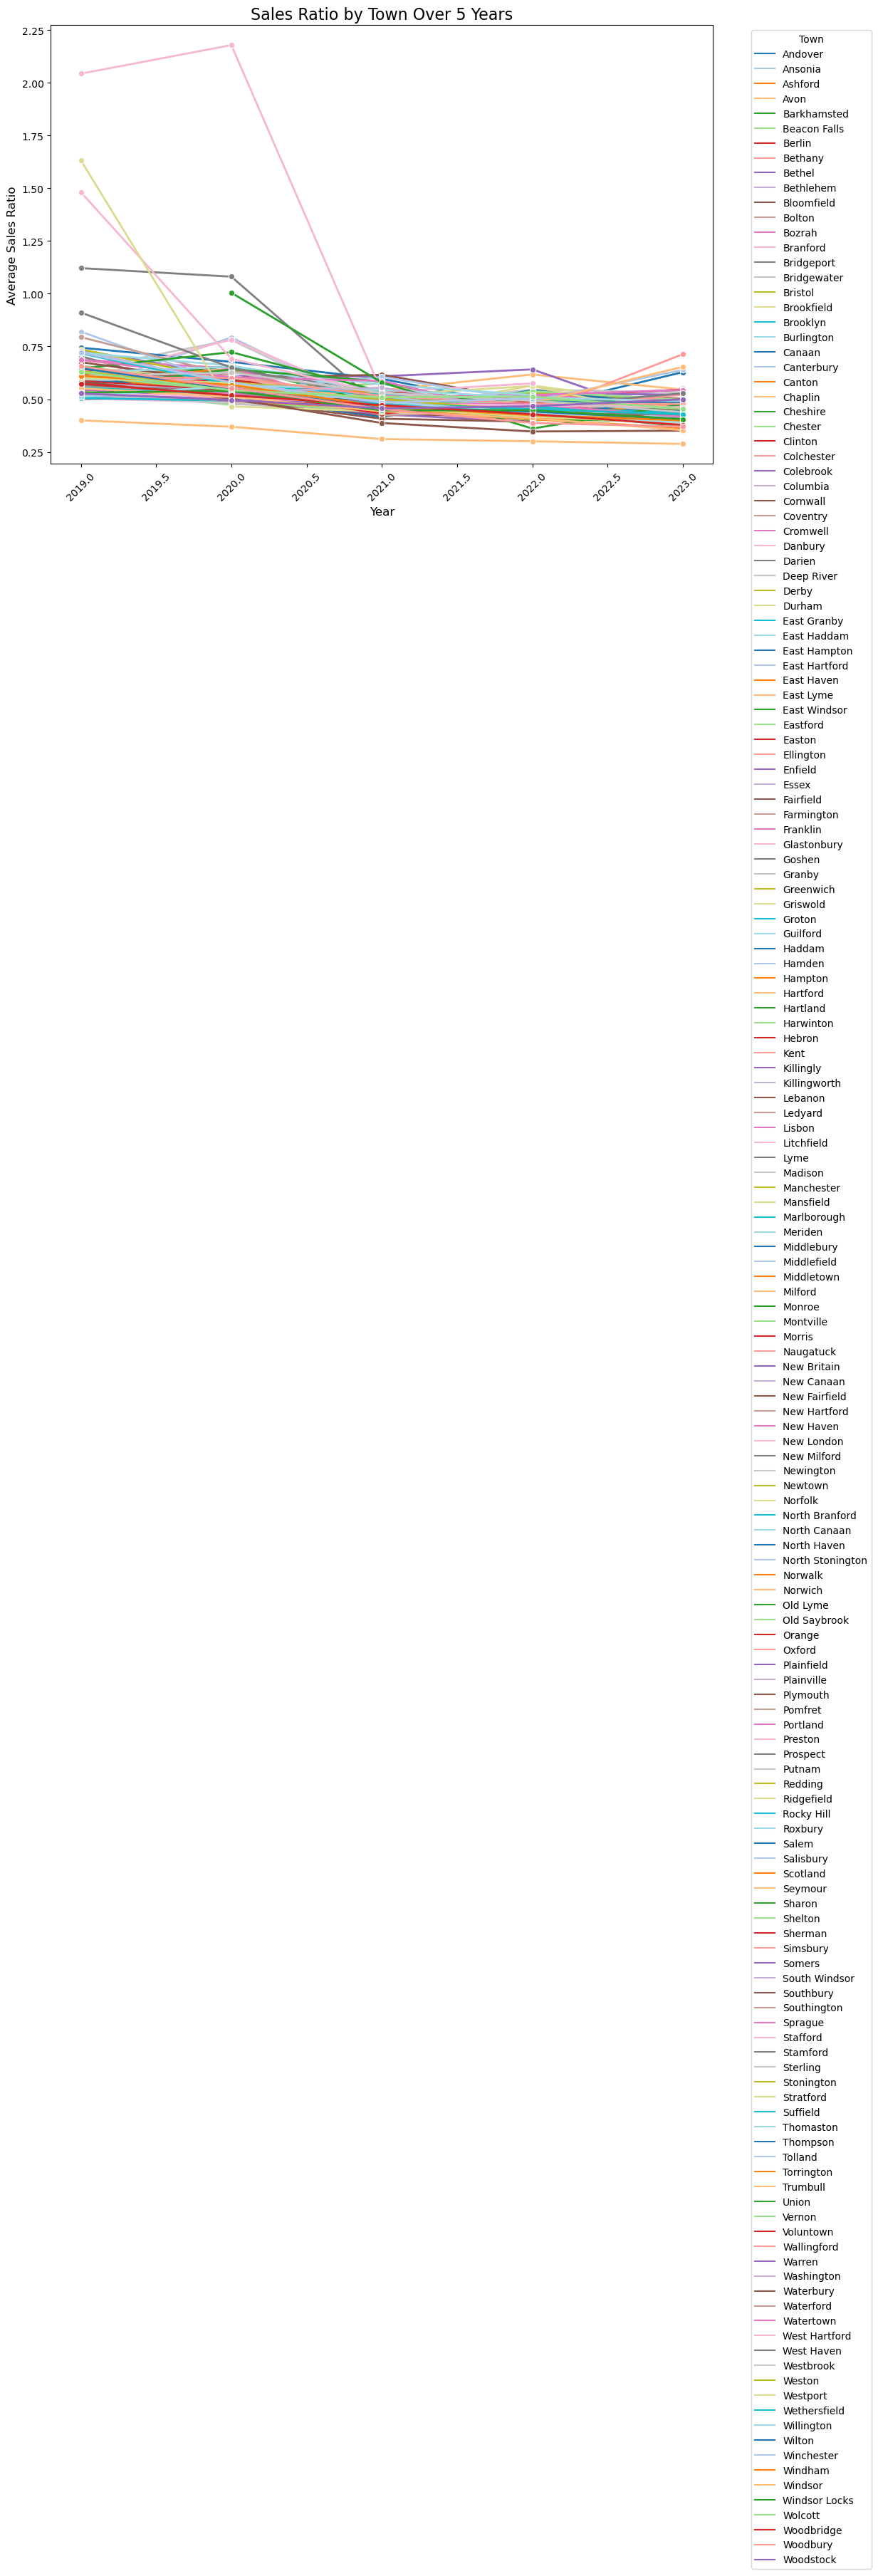

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'town' and 'year' to calculate the average sales ratio for each town over years
town_sales_ratio = summary_data.groupby(['town', 'year'])['avg_sales_ratio'].mean().reset_index()

# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Use seaborn to create a line plot for sales ratio by year for each town
sns.lineplot(data=town_sales_ratio, x='year', y='avg_sales_ratio', hue='town', marker='o', palette='tab20', linewidth=2)

# Title and labels
plt.title('Sales Ratio by Town Over 5 Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Sales Ratio', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Town', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()  # To prevent overlap with the legend
plt.show()


## median_sales_ratio

In [143]:
import pandas as pd

# Load the summary data CSV file
# summary_data = pd.read_csv('./cse4705_summary_data.csv')

# Grouping the data by 'town' and 'year' to get the median sales ratio across years
town_median_sales_ratio = summary_data.groupby(['town', 'year'])['median_sales_ratio'].mean().unstack()

# Define high and low sales ratio thresholds
high_sales_ratio_threshold = 0.85
low_sales_ratio_threshold = 0.50

# Find towns with a consistent high sales ratio (>= 0.85 for 5 years)
high_sales_ratio_towns = town_median_sales_ratio[(town_median_sales_ratio > high_sales_ratio_threshold).sum(axis=1) >= 5]

# Find towns with a consistent low sales ratio (<= 0.50 for 5 years)
low_sales_ratio_towns = town_median_sales_ratio[(town_median_sales_ratio < low_sales_ratio_threshold).sum(axis=1) >= 5]

# Combine the results into one DataFrame for easier viewing
consistent_sales_ratio_towns = pd.concat([high_sales_ratio_towns, low_sales_ratio_towns])

# Display the results
print("Towns with Consistent High or Low Median Sales Ratios:")
print(consistent_sales_ratio_towns)


Towns with Consistent High or Low Median Sales Ratios:
year       2019    2020     2021    2022    2023
town                                            
Hartford  0.357  0.3129  0.32255  0.3145  0.2892


## median_sales_ratio graph

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/9d/_d3xgvmd6wlcfjnhml584c_r0000gn/T/ipykernel_19310/48898596.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # To prevent overlap with the legend


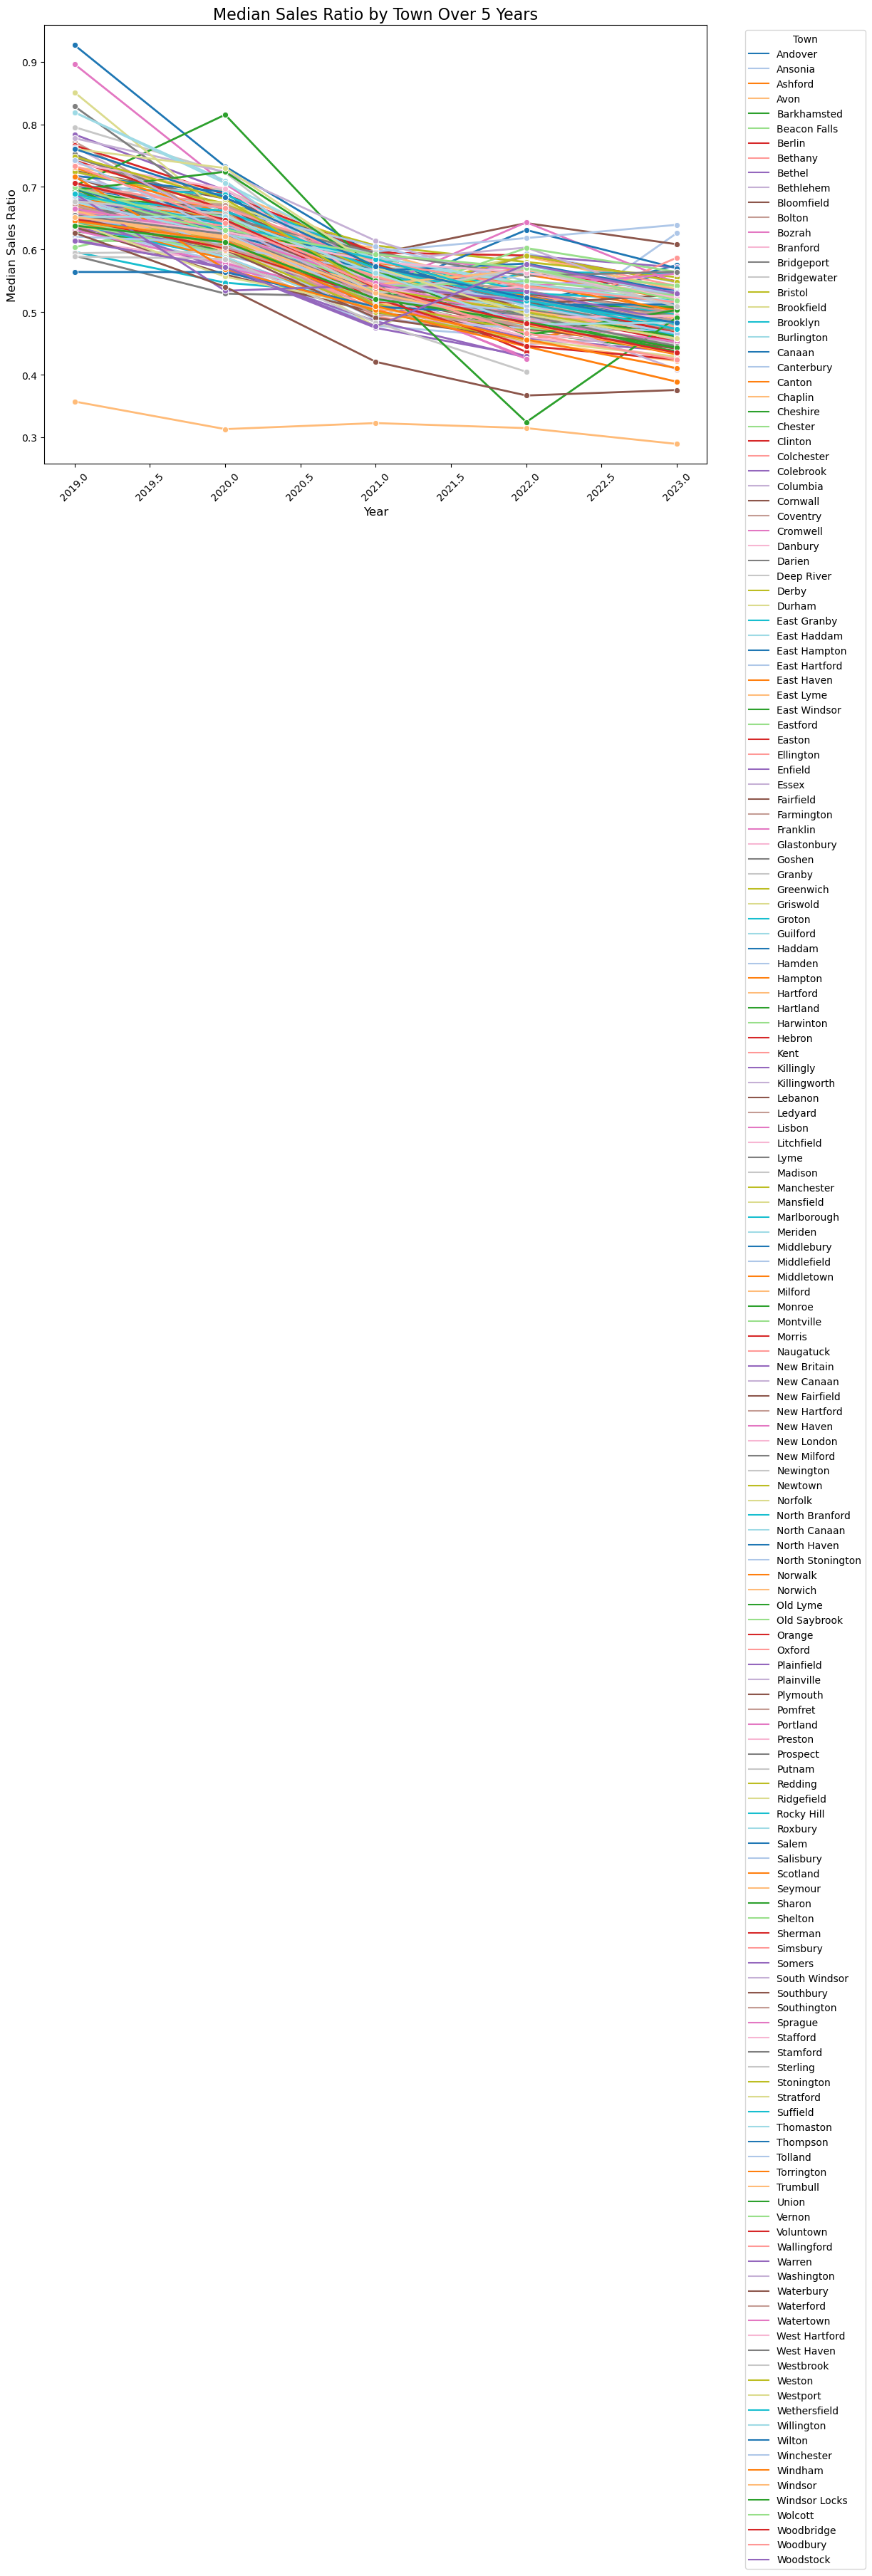

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the summary data CSV file
# summary_data = pd.read_csv('./cse4705_summary_data')

# group by town and year to calculate the median sales ratio for each year
town_median_sales_ratio = summary_data.groupby(['town', 'year'])['median_sales_ratio'].mean().reset_index()

# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# create a line plot for median sales ratio by year for each town
sns.lineplot(data=town_median_sales_ratio, x='year', y='median_sales_ratio', hue='town', marker='o', palette='tab20', linewidth=2)

# Title and labels
plt.title('Median Sales Ratio by Town Over 5 Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Sales Ratio', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Town', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()  # To prevent overlap with the legend
plt.show()


## towns that have a volatile median_sales_ratio

In [145]:
import pandas as pd


# Group by 'town' and 'year' to calculate the median sales ratio for each year
town_median_sales_ratio = summary_data.groupby(['town', 'year'])['median_sales_ratio'].mean().reset_index()

# Sorting the data by 'town' and 'year' to ensure chronological order
town_median_sales_ratio = town_median_sales_ratio.sort_values(by=['town', 'year'])

# Calculate the difference in median sales ratio for each town between consecutive years
town_median_sales_ratio['difference'] = town_median_sales_ratio.groupby('town')['median_sales_ratio'].diff()

# Find towns where the absolute difference is greater than 0.25 between two years
volatile_towns = town_median_sales_ratio[town_median_sales_ratio['difference'].abs() > 0.25]

# Display volatile towns
print("Towns with volatile median_sales_ratio:")
print(volatile_towns[['town', 'year', 'median_sales_ratio', 'difference']])


Towns with volatile median_sales_ratio:
         town  year  median_sales_ratio  difference
309  Hartland  2021             0.56125     -0.2542


## towns that have a volatile median_sales_ratio GRAPH

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


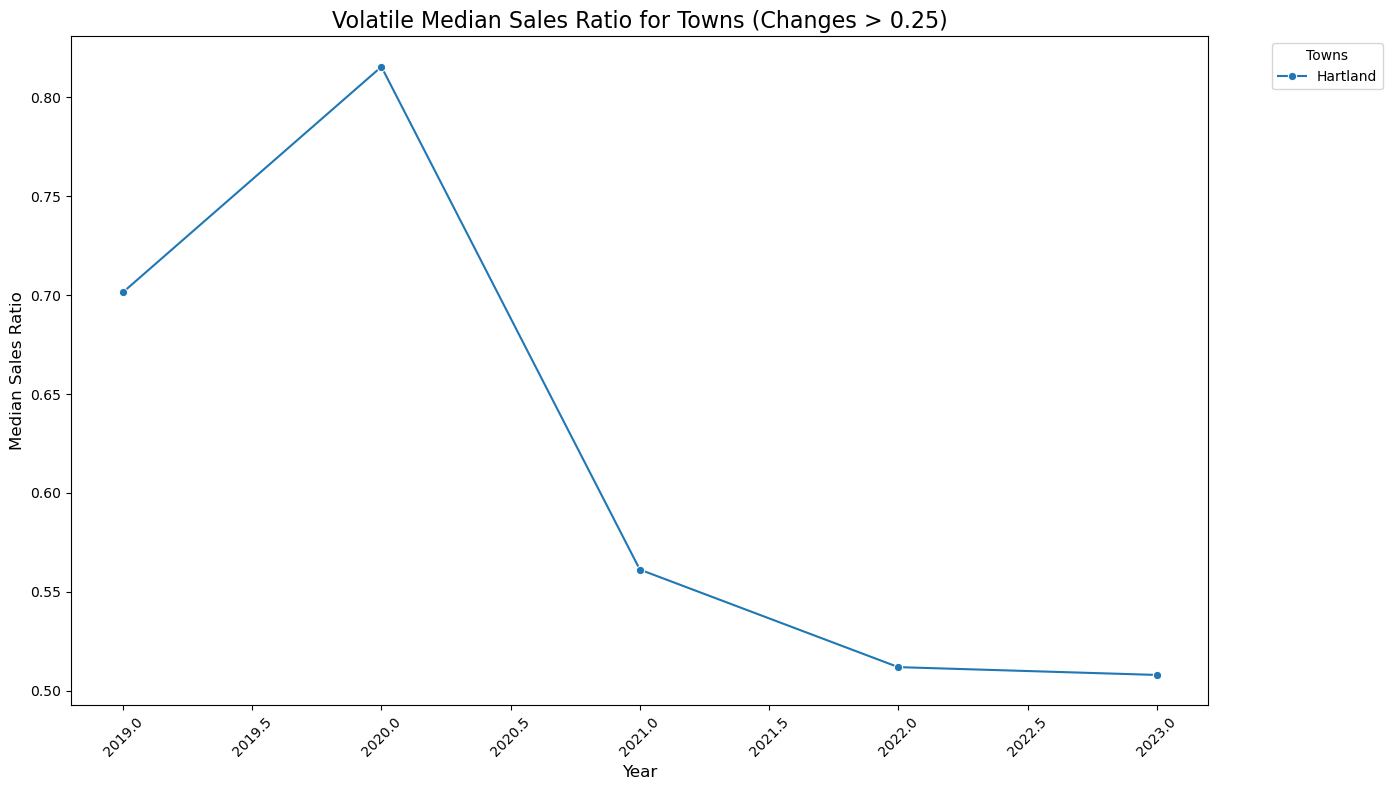

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'town' and 'year' to calculate the median sales ratio for each year
town_median_sales_ratio = summary_data.groupby(['town', 'year'])['median_sales_ratio'].mean().reset_index()

# Sorting the data by 'town' and 'year' to ensure chronological order
town_median_sales_ratio = town_median_sales_ratio.sort_values(by=['town', 'year'])

# Calculate the difference in median sales ratio for each town between consecutive years
town_median_sales_ratio['difference'] = town_median_sales_ratio.groupby('town')['median_sales_ratio'].diff()

# Find towns where the absolute difference is greater than 0.25 between two years
volatile_towns = town_median_sales_ratio[town_median_sales_ratio['difference'].abs() > 0.25]

# Get the unique towns with volatile median_sales_ratio changes
volatile_town_list = volatile_towns['town'].unique()

# Plot data for all volatile towns
plt.figure(figsize=(14, 8))

# Loop through each volatile town and plot their median_sales_ratio
for town in volatile_town_list:
    volatile_town_data = town_median_sales_ratio[town_median_sales_ratio['town'] == town]
    sns.lineplot(data=volatile_town_data, x='year', y='median_sales_ratio', marker='o', label=town)

# Title and labels
plt.title('Volatile Median Sales Ratio for Towns (Changes > 0.25)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Sales Ratio', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Towns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # To prevent overlap with the legend
plt.show()
